In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [2]:
diabetes_data = pd.read_csv("https://raw.githubusercontent.com/eadigun24/Diabetes_Admission_Analysis/adigun/Resources/diabetic_data.csv")
diabetes_data


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
diabetes_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
diabetes_data.value_counts()

encounter_id  patient_nbr  race             gender  age      weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
2521974       80499960     Caucasian        Male    [80-90)  ?       6                  3                         7                    5                 ?           ?                  47                  1               6                0                  0            

In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
#pd.get_dummies(diabetes_data['race'],dtype=int)
diabetes_data['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [7]:
diabetes_df = diabetes_data.copy()
diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
colums_to_drop = ['encounter_id', 'patient_nbr'
                 , 'payer_code', 'medical_specialty'
                 , 'max_glu_serum', 'A1Cresult'
                 , 'diag_1', 'diag_2', 'diag_3'
                 , 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide'
                 , 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide'
                 , 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone'
                 , 'tolazamide', 'examide', 'citoglipton', 'insulin'
                 , 'glyburide-metformin', 'glipizide-metformin'
                 , 'glimepiride-pioglitazone', 'metformin-rosiglitazone'
                 , 'metformin-pioglitazone']
diabetes_df = diabetes_df.drop(columns=colums_to_drop)


In [10]:
diabetes_df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,41,0,1,0,0,0,1,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,59,0,18,0,0,0,9,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,11,5,13,2,0,1,6,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,44,1,16,0,0,0,7,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,51,0,8,0,0,0,5,Ch,Yes,NO


In [11]:
# Viewing and analyzing the data ...
diabetes_df['weight'].value_counts()
# diabetes_df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']]
# diabetes_df[['time_in_hospital']]
# diabetes_df[['number_outpatient', 'number_emergency', 'number_inpatient']]
# diabetes_df[['num_lab_procedures', 'num_procedures', 'num_medications']]
# diabetes_df[['number_diagnoses']]


weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

In [12]:
diabetes_df.info()
#diabetes_df.loc[diabetes_df['readmitted'] == '>30']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    101766 non-null  object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   num_lab_procedures        101766 non-null  int64 
 9   num_procedures            101766 non-null  int64 
 10  num_medications           101766 non-null  int64 
 11  number_outpatient         101766 non-null  int64 
 12  number_emergency          101766 non-null  int64 
 13  number_inpatient          101766 non-null  int64 
 14  numb

In [13]:
print(diabetes_df['change'].value_counts())
print('')
print(diabetes_df['diabetesMed'].value_counts())

change
No    54755
Ch    47011
Name: count, dtype: int64

diabetesMed
Yes    78363
No     23403
Name: count, dtype: int64


In [14]:
diabetesMed_ode = OrdinalEncoder(categories=[['Yes','No']], encoded_missing_value=-1, handle_unknown='use_encoded_value', unknown_value=-1)
diabetesMed_ode.fit(diabetes_df['diabetesMed'].values.reshape(-1,1))

change_ode = OrdinalEncoder(categories=[['No','Ch']], encoded_missing_value=-1, handle_unknown='use_encoded_value', unknown_value=-1)
change_ode.fit(diabetes_df['change'].values.reshape(-1,1))

OrdinalEncoder(categories=[['No', 'Ch']], encoded_missing_value=-1,
               handle_unknown='use_encoded_value', unknown_value=-1)

In [15]:
print(diabetes_df['race'].value_counts())
print('')
print(diabetes_df['weight'].value_counts())
print('')
print(diabetes_df['gender'].value_counts())
print('')
print(diabetes_df['age'].value_counts())

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64


In [16]:
race_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
race_ohe.fit(diabetes_df['race'].values.reshape(-1,1))

weight_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
weight_ohe.fit(diabetes_df['weight'].values.reshape(-1,1))

gender_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
gender_ohe.fit(diabetes_df['gender'].values.reshape(-1,1))

age_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
age_ohe.fit(diabetes_df['age'].values.reshape(-1,1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [17]:
def X_preprocess(X_data):
    # Transform each colum into numpy arrays
    diabetesMed_encoded = diabetesMed_ode.transform(X_data['diabetesMed'].values.reshape(-1,1))
    change_encoded = change_ode.transform(X_data['change'].values.reshape(-1,1))
    race_encoded = race_ohe.transform(X_data['race'].values.reshape(-1,1))
    weight_encoded = weight_ohe.transform(X_data['weight'].values.reshape(-1,1))
    gender_encoded = gender_ohe.transform(X_data['gender'].values.reshape(-1,1))
    age_encoded = age_ohe.transform(X_data['age'].values.reshape(-1,1))

    # Reorganize the numpy arrays into a DataFrame
    race_df = pd.DataFrame(race_encoded, columns= race_ohe.get_feature_names_out())
    weight_df = pd.DataFrame(weight_encoded, columns= weight_ohe.get_feature_names_out())
    gender_df = pd.DataFrame(gender_encoded, columns= gender_ohe.get_feature_names_out())
    age_df = pd.DataFrame(age_encoded, columns= age_ohe.get_feature_names_out())
    out_df =pd.concat([race_df, weight_df,gender_df,age_df], axis=1)
    out_df['change'] = change_encoded
    out_df['diabetesMed'] = diabetesMed_encoded

    # Return the DataFrame
    return out_df


In [18]:
# Create the encoded dataframe ...
diabetes_df_preprocessed = diabetes_df.copy()
diabetes_df_preprocessed = X_preprocess(diabetes_df_preprocessed)

In [19]:
diabetes_df_preprocessed = diabetes_df_preprocessed.drop(columns=['x0_?'])
diabetes_df_preprocessed.head()


,x0_AfricanAmerican,x0_Asian,x0_Caucasian,x0_Hispanic,x0_Other,x0_[0-25),x0_[100-125),x0_[125-150),x0_[150-175),x0_[175-200),...,x0_[20-30),x0_[30-40),x0_[40-50),x0_[50-60),x0_[60-70),x0_[70-80),x0_[80-90),x0_[90-100),change,diabetesMed
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
#diabetes_df_preprocessed['']
diabetes_df_post = diabetes_df.drop(columns=['race','gender','age','weight','change','diabetesMed'])


In [21]:
final_diabetes_df = pd.concat([diabetes_df_post, diabetes_df_preprocessed], axis=1)


In [22]:
#final_diabetes_df['readmitted']
final_diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   admission_type_id         101766 non-null  int64  
 1   discharge_disposition_id  101766 non-null  int64  
 2   admission_source_id       101766 non-null  int64  
 3   time_in_hospital          101766 non-null  int64  
 4   num_lab_procedures        101766 non-null  int64  
 5   num_procedures            101766 non-null  int64  
 6   num_medications           101766 non-null  int64  
 7   number_outpatient         101766 non-null  int64  
 8   number_emergency          101766 non-null  int64  
 9   number_inpatient          101766 non-null  int64  
 10  number_diagnoses          101766 non-null  int64  
 11  readmitted                101766 non-null  object 
 12  x0_AfricanAmerican        101766 non-null  float64
 13  x0_Asian                  101766 non-null  f

In [23]:
final_diabetes_df['readmitted'] = final_diabetes_df['readmitted'].replace({"NO": 0, "<30":1, ">30":2 })

In [24]:
final_diabetes_df['readmitted'] = pd.to_numeric(final_diabetes_df['readmitted'])
final_diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   admission_type_id         101766 non-null  int64  
 1   discharge_disposition_id  101766 non-null  int64  
 2   admission_source_id       101766 non-null  int64  
 3   time_in_hospital          101766 non-null  int64  
 4   num_lab_procedures        101766 non-null  int64  
 5   num_procedures            101766 non-null  int64  
 6   num_medications           101766 non-null  int64  
 7   number_outpatient         101766 non-null  int64  
 8   number_emergency          101766 non-null  int64  
 9   number_inpatient          101766 non-null  int64  
 10  number_diagnoses          101766 non-null  int64  
 11  readmitted                101766 non-null  int64  
 12  x0_AfricanAmerican        101766 non-null  float64
 13  x0_Asian                  101766 non-null  f

In [25]:
# Get the features data from the DataFrame.
X = final_diabetes_df.drop(columns='readmitted')

# Get the target series from the DataFrame.
y  = final_diabetes_df['readmitted']

# Split the data into training and testing dataframes.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
# Scale the data ...
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler instance
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_trained_scaled  = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
from sklearn.cluster import KMeans

# model = KMeans(n_clusters=3, n_init='auto')
# model.fit(X_trained_scaled)
# readmission_predictions = model.predict(X_test_scaled)

model = KMeans(n_clusters=3, n_init='auto')
model.fit(final_diabetes_df)
readmission_predictions = model.predict(final_diabetes_df)

<Axes: title={'center': 'It is what it is'}, xlabel='time_in_hospital', ylabel='num_procedures'>

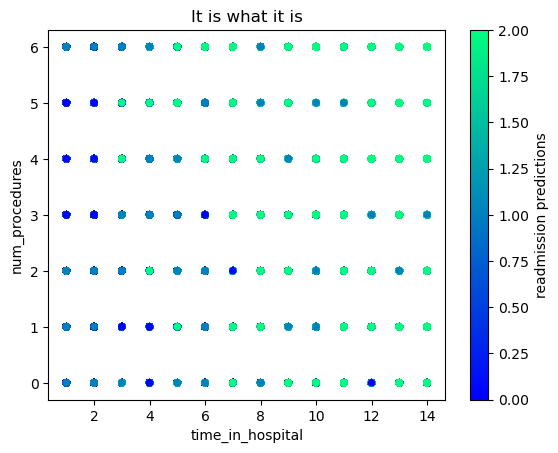

In [28]:
diabetes_df_predictions = final_diabetes_df.copy()
diabetes_df_predictions['readmission predictions'] = readmission_predictions

diabetes_df_predictions.plot.scatter(x="time_in_hospital", y="num_procedures", c="readmission predictions", title="It is what it is", colormap="winter")